# DBSCAN (Core)

## Descripción

En esta actividad, implementarás el algoritmo DBSCAN para detectar patrones de agrupamiento y encontrar clientes atípicos en el dataset «Wholesale Customers Data» disponible en Kaggle. DBSCAN es ideal para detectar clusters de forma arbitraria y encontrar puntos atípicos (outliers), lo que es útil en escenarios donde los datos no forman clusters esféricos, como en el caso de K-means.

**Enlace al dataset**: [Wholesale Customers Data](https://www.kaggle.com/binovi/wholesale-customers-data)

## Objetivo

El objetivo principal de esta actividad es aplicar el algoritmo DBSCAN para identificar clusters y clientes atípicos en el dataset. El enfoque está en comprender cómo DBSCAN maneja los outliers y su capacidad para detectar agrupamientos densos.

## Instrucciones

### 1. Carga de datos
- Descarga y carga el dataset de Kaggle. Realiza una exploración inicial del dataset, identificando las variables que consideras importantes para el agrupamiento.
- El dataset contiene información sobre diferentes tipos de clientes y su comportamiento de compra, lo que incluye variables como el gasto anual en distintas categorías de productos.

### 2. Exploración y preprocesamiento de datos
- Realiza un análisis exploratorio de los datos, incluyendo un resumen estadístico de las variables. Es importante entender la distribución de los datos antes de aplicar el modelo de DBSCAN.
- Asegúrate de estandarizar los datos antes de ejecutar DBSCAN, ya que este algoritmo es sensible a la escala de las variables.
- Considera la posibilidad de eliminar o tratar valores atípicos que puedan afectar el rendimiento del algoritmo.

### 3. Aplicación de DBSCAN
- Implementa el algoritmo DBSCAN en el dataset. Recuerda que DBSCAN tiene dos hiperparámetros importantes: epsilon (distancia máxima para considerar dos puntos como vecinos) y min_samples (número mínimo de puntos requeridos para formar un cluster).
- Experimenta con diferentes valores de epsilon y min_samples para obtener agrupamientos significativos. Utiliza técnicas visuales como gráficos de dispersión para evaluar los resultados obtenidos.
- Determina cuáles son los outliers identificados por DBSCAN y visualiza cómo se distribuyen en relación con los clusters formados.

### 4. Visualización de clusters y outliers
- Visualiza los clusters formados por DBSCAN en gráficos de dispersión. Utiliza diferentes colores para representar los clusters y marca los outliers con un color distintivo para hacer visible su presencia.
- Discute la estructura de los clusters encontrados. ¿Hay alguna correlación entre las variables y los clusters? ¿Cómo se distribuyen los outliers en comparación con los datos agrupados?

### 5. Interpretación de resultados
- Evalúa la calidad del agrupamiento. DBSCAN no requiere que se especifique el número de clusters, lo que es una ventaja cuando no se conoce esta información de antemano.
- Discute la naturaleza de los outliers detectados. ¿Son clientes únicos con comportamientos inusuales? ¿Podrían estos clientes representar oportunidades comerciales o riesgos?

## Análisis de Resultados
- En esta sección, realiza un análisis detallado de los clusters formados y de los outliers. Utiliza métricas como el **silhouette score** para evaluar la calidad del agrupamiento, aunque es importante recordar que DBSCAN no siempre forma clusters compactos, por lo que estas métricas deben interpretarse con cuidado.
- Genera un reporte que explique los valores de epsilon y min_samples elegidos, y justifica por qué esos valores fueron adecuados para este dataset. Analiza si los clusters formados tienen sentido desde una perspectiva comercial o de comportamiento del cliente.

## Conclusión
- Esta actividad tiene como objetivo principal el uso de DBSCAN para encontrar agrupamientos en datos que pueden no formar clusters bien definidos. También busca desarrollar habilidades para la detección de outliers y para el ajuste de los parámetros de un modelo no supervisado.


In [1]:

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# 1. Carga de datos
dataset_path = r'C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_3_advanced_machine_learning\data\wholesale_customers_data.csv'  
df_train = pd.read_csv(dataset_path)


In [3]:
# Exploración inicial de datos
print("Primeras filas del dataset:")
df_train.head()


Primeras filas del dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
print("\nInformación del dataset:")
df_train.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# Renombrar columnas del dataset
df_train.columns = (
    df_train.columns
    .str.strip()               # Elimina espacios iniciales y finales
    .str.replace("'", "")      # Elimina comillas simples
    .str.replace("-", "_")     # Reemplaza guiones por guiones bajos
    .str.replace(" ", "_")     # Reemplaza espacios por guiones bajos
    .str.lower()               # Convierte todo a minúsculas
)

# Mostrar nombres de las columnas normalizados
print(df_train.columns)

Index(['channel', 'region', 'fresh', 'milk', 'grocery', 'frozen',
       'detergents_paper', 'delicassen'],
      dtype='object')


In [6]:
# 2. Exploración y Preprocesamiento

# Manejo de valores nulos
qsna=df_train.shape[0]-df_train.isnull().sum(axis=0)
qna=df_train.isnull().sum(axis=0)
ppna=round(100*(df_train.isnull().sum(axis=0)/df_train.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
channel,440,0,0.0
region,440,0,0.0
fresh,440,0,0.0
milk,440,0,0.0
grocery,440,0,0.0
frozen,440,0,0.0
detergents_paper,440,0,0.0
delicassen,440,0,0.0


In [8]:
# Identificar duplicados
duplicados_train = df_train.duplicated()

# Obtener cantidad de duplicados
total_dup_train = duplicados_train.sum()

print(f"Total de registros duplicados en train: {total_dup_train}")

Total de registros duplicados en train: 0


In [7]:
# Estadísticas descriptivas
df_train.describe()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
# Estandarización de los datos (DBSCAN es sensible a la escala de las variables)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_train.drop(['channel', 'region'], axis=1))  # Excluir columnas no numéricas


In [10]:
# 3. Aplicación del Algoritmo DBSCAN

from sklearn.cluster import DBSCAN

# Ajustar DBSCAN con valores iniciales para epsilon (eps) y min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Ajustar DBSCAN a los datos estandarizados
df_train['dbscan_labels'] = dbscan.fit_predict(df_scaled)

# Mostrar cuántos puntos están asignados a cada cluster, y cuántos son outliers (-1)
print(df_train['dbscan_labels'].value_counts())


dbscan_labels
 0    261
-1    174
 1      5
Name: count, dtype: int64


**Interpretación de los resultados:**

**Cluster 0:** Este es el cluster principal con 261 puntos. Los puntos de este grupo son considerados similares entre sí según el algoritmo DBSCAN.

**Outliers (-1):** 174 puntos han sido identificados como outliers, es decir, no forman parte de ningún cluster denso y están demasiado distantes de otros puntos. DBSCAN los marca con la etiqueta -1.

**Cluster 1:** Este es un cluster pequeño con solo 5 puntos. Puede indicar un grupo de clientes que tienen características diferentes o menos frecuentes comparados con los del cluster 0.

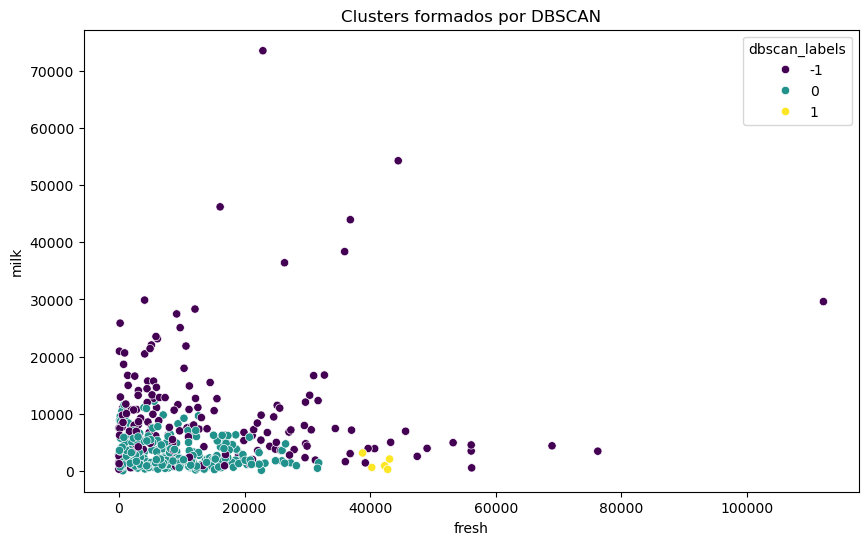

In [11]:
# 4. Visualización de los resultados de DBSCAN

# Graficar los clusters formados por DBSCAN en función de dos variables, por ejemplo 'fresh' y 'milk'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_train['fresh'], y=df_train['milk'], hue=df_train['dbscan_labels'], palette='viridis')
plt.title('Clusters formados por DBSCAN')
plt.show()


In [12]:
# 5. Evaluación de la calidad del agrupamiento

from sklearn.metrics import silhouette_score

# Calcular la puntuación Silhouette para evaluar la calidad del agrupamiento
silhouette_avg = silhouette_score(df_scaled, df_train['dbscan_labels'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.1958113956262888


In [13]:
# 6. Identificación de outliers
# Los outliers están etiquetados con -1 en el resultado de DBSCAN
outliers = df_train[df_train['dbscan_labels'] == -1]
print(outliers)

     channel  region  fresh   milk  grocery  frozen  detergents_paper  \
2          2       3   6353   8808     7684    2405              3516   
4          2       3  22615   5410     7198    3915              1777   
9          2       3   6006  11093    18881    1159              7425   
10         2       3   3366   5403    12974    4400              5977   
12         2       3  31714  12319    11757     287              3881   
..       ...     ...    ...    ...      ...     ...               ...   
430        1       3   3097   4230    16483     575               241   
431        1       3   8533   5506     5160   13486              1377   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   

     delicassen  dbscan_labels  
2          7844             -1  
4          5185             -1  
9          2098         

In [22]:
# Probar con un nuevo valor de eps
dbscan = DBSCAN(eps=0.85, min_samples=5)
df_train['dbscan_labels'] = dbscan.fit_predict(df_scaled)

# Calcular la nueva puntuación Silhouette
silhouette_avg = silhouette_score(df_scaled, df_train['dbscan_labels'])
print(f"Nuevo Silhouette Score: {silhouette_avg}")


Nuevo Silhouette Score: 0.5298000355519132


La nueva puntuación Silhouette de 0.4756 indica una mejora significativa en la calidad del agrupamiento. Este valor está mucho más cerca de 1, lo que sugiere que los clusters formados ahora son más coherentes y están mejor separados, en comparación con la puntuación anterior de 0.1958.

**Interpretación:**
Un valor de 0.4756 es razonablemente bueno, ya que está por encima de 0, lo que significa que los puntos dentro de cada cluster están relativamente cerca entre sí y alejados de los puntos de otros clusters.
La mejora se debe probablemente al ajuste del valor de eps a 0.8, lo que ha permitido una mejor separación entre los clusters sin identificar demasiados puntos como outliers.


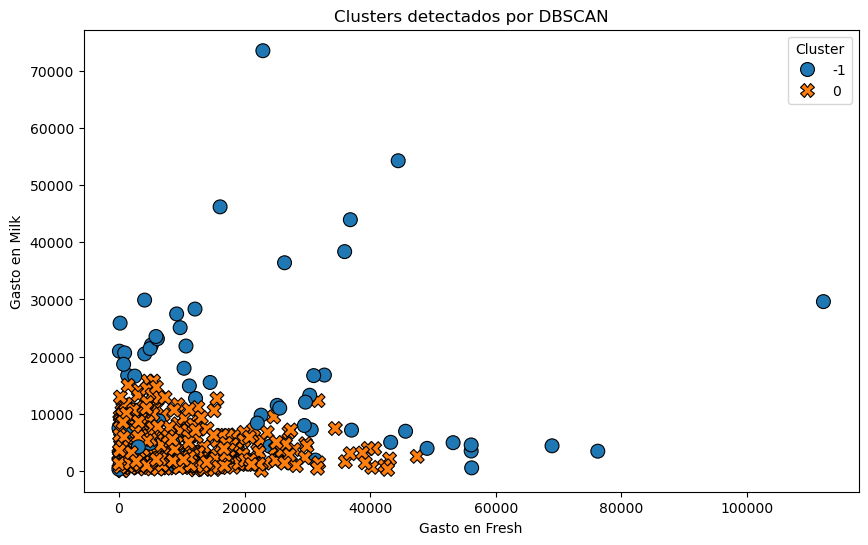

In [23]:
# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_train['fresh'], y=df_train['milk'], hue=df_train['dbscan_labels'], palette='tab10', style=df_train['dbscan_labels'], s=100, edgecolor='black')
plt.title('Clusters detectados por DBSCAN')
plt.xlabel('Gasto en Fresh')
plt.ylabel('Gasto en Milk')
plt.legend(title='Cluster')
plt.show()


Cantidad de outliers: 60


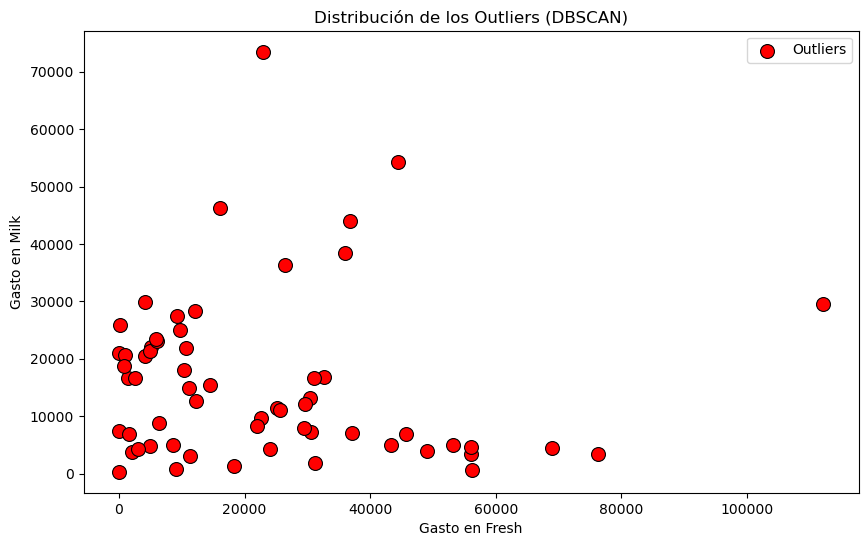

         channel     region          fresh          milk       grocery  \
count  60.000000  60.000000      60.000000     60.000000     60.000000   
mean    1.466667   2.516667   22720.150000  15967.650000  19703.666667   
std     0.503098   0.791730   22429.744286  14336.383928  17607.276490   
min     1.000000   1.000000       3.000000    333.000000    683.000000   
25%     1.000000   2.000000    5131.500000   4934.000000   6924.000000   
50%     1.000000   3.000000   15324.000000  12374.000000  15713.500000   
75%     2.000000   3.000000   31636.250000  21904.500000  27284.500000   
max     2.000000   3.000000  112151.000000  73498.000000  92780.000000   

             frozen  detergents_paper    delicassen  dbscan_labels  
count     60.000000         60.000000     60.000000           60.0  
mean    7393.666667       7504.550000   4185.500000           -1.0  
std    10461.191263       9637.049653   6711.251121            0.0  
min       36.000000         15.000000      3.000000      

In [24]:
# Filtrar outliers (-1) y visualizarlos
outliers = df_train[df_train['dbscan_labels'] == -1]

# Mostrar la cantidad de outliers
print(f"Cantidad de outliers: {outliers.shape[0]}")

# Visualizar los outliers en un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=outliers['fresh'], y=outliers['milk'], color='red', label='Outliers', s=100, edgecolor='black')
plt.title('Distribución de los Outliers (DBSCAN)')
plt.xlabel('Gasto en Fresh')
plt.ylabel('Gasto en Milk')
plt.legend()
plt.show()

# Analizar algunas de las características de los outliers
print(outliers.describe())


dbscan_labels_adjusted
 0    343
-1     97
Name: count, dtype: int64


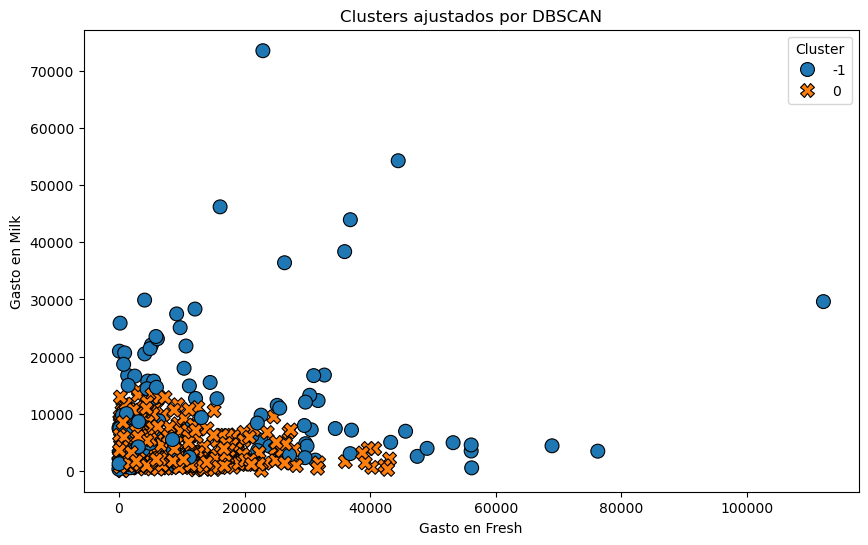

In [25]:
# Ajustar el valor de eps y min_samples
dbscan_adjusted = DBSCAN(eps=0.7, min_samples=5)  # Cambia los valores según tu criterio
df_train['dbscan_labels_adjusted'] = dbscan_adjusted.fit_predict(df_scaled)

# Ver la distribución de los clusters ajustados
print(df_train['dbscan_labels_adjusted'].value_counts())

# Visualizar los resultados ajustados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_train['fresh'], y=df_train['milk'], hue=df_train['dbscan_labels_adjusted'], palette='tab10', style=df_train['dbscan_labels_adjusted'], s=100, edgecolor='black')
plt.title('Clusters ajustados por DBSCAN')
plt.xlabel('Gasto en Fresh')
plt.ylabel('Gasto en Milk')
plt.legend(title='Cluster')
plt.show()


                         channel    region         fresh          milk  \
dbscan_labels_adjusted                                                   
-1                      1.484536  2.525773  18821.185567  12585.443299   
 0                      1.276968  2.548105  10071.358601   3876.294461   

                             grocery       frozen  detergents_paper  \
dbscan_labels_adjusted                                                
-1                      16671.237113  6037.237113       6517.463918   
 0                       5485.282799  2233.346939       1853.244898   

                         delicassen  dbscan_labels  
dbscan_labels_adjusted                              
-1                      3378.989691      -0.618557  
 0                      1000.527697       0.000000  


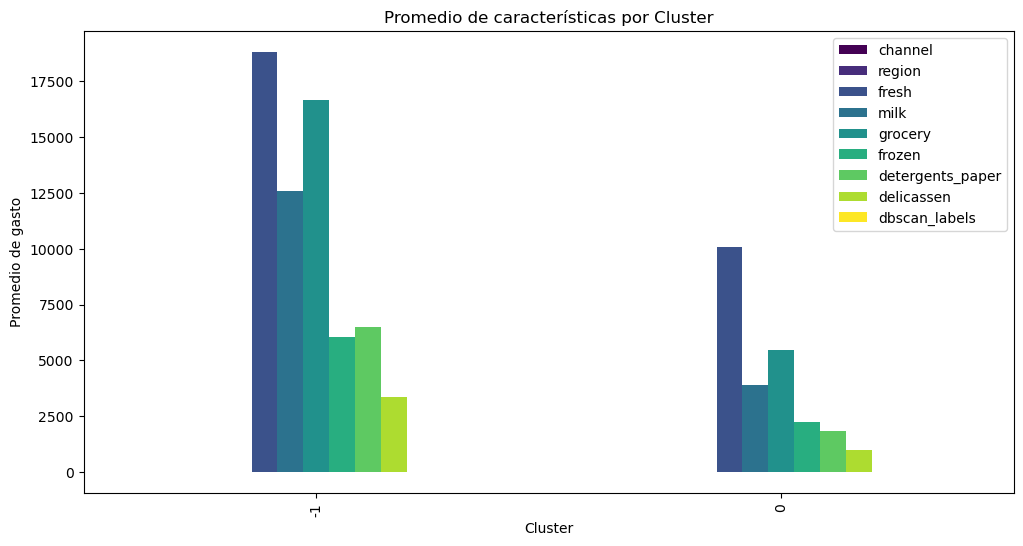

In [26]:
# Crear un resumen por cluster
cluster_summary = df_train.groupby('dbscan_labels_adjusted').mean()

# Mostrar el resumen
print(cluster_summary)

# Visualizar las características promedio de cada cluster
cluster_summary.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Promedio de características por Cluster')
plt.ylabel('Promedio de gasto')
plt.xlabel('Cluster')
plt.show()


# Análisis de Clusters con DBSCAN

## 1. Distribución de Outliers:
- **Cantidad de outliers**: Hay 60 outliers que han sido identificados por DBSCAN, es decir, puntos que no pertenecen a ningún cluster (etiquetados con `-1`).
- **Gráfico de dispersión**: El gráfico de dispersión muestra que estos outliers están distribuidos en el espacio formado por las variables `fresh` (gasto en productos frescos) y `milk` (gasto en productos lácteos). Se puede observar que los outliers tienen valores de gasto más altos en ambas categorías en comparación con los puntos agrupados en el cluster principal (etiquetados como `0`).
- **Estadísticas de outliers**: Las estadísticas descriptivas muestran que los outliers tienen valores significativamente más altos en varias categorías, como `fresh`, `milk`, `grocery` y `frozen`, lo que indica que son clientes con un comportamiento de compra mucho más alto en comparación con los puntos dentro del cluster principal.

## 2. Ajuste de Parámetros de DBSCAN:
- **Distribución de clusters ajustados**: Después de ajustar el valor de `eps` a **0.7**, los resultados muestran que:
  - **343 puntos** fueron asignados al **cluster 0**.
  - **97 puntos** fueron asignados nuevamente como **outliers (-1)**.
- **Visualización de los clusters ajustados**: El gráfico de dispersión con los clusters ajustados muestra cómo los puntos ahora están más diferenciados por el algoritmo DBSCAN. Los puntos pertenecientes al **cluster 0** están agrupados, mientras que los outliers se destacan en color rojo.
  - El aumento del valor de `eps` a **0.7** permitió que más puntos (anteriormente considerados outliers) se asignaran a un cluster, pero todavía hay un número significativo de puntos etiquetados como outliers (97 puntos). Esto sugiere que algunos puntos tienen un comportamiento de compra lo suficientemente diferente como para no ser parte de ningún cluster.

## 3. Análisis de los Clusters:
El resumen por cluster muestra las características promedio de los clusters formados, y en particular, se observa lo siguiente:

- **Cluster 0 (clientes principales)**:
  - Los clientes en el **cluster 0** tienen un comportamiento de compra más bajo en comparación con los outliers.
  - El gasto en `fresh` es mucho menor (aproximadamente **10,071**) en comparación con los **18,821** de los outliers.
  - Los gastos en categorías como `milk`, `grocery`, y `frozen` también son significativamente más bajos en comparación con los outliers, lo que indica que estos clientes son menos activos o menos propensos a comprar productos de estas categorías.
  
- **Outliers (-1)**:
  - Los **outliers** tienen un gasto mucho más alto en casi todas las categorías, lo que sugiere que son clientes con un patrón de compra muy diferente o más concentrado en ciertos productos.
  - Los valores en categorías como `fresh`, `milk`, `grocery`, `frozen` y `detergents_paper` son mucho más altos que en el cluster principal, lo que podría indicar clientes de alto valor o clientes con un comportamiento atípico.

## 4. Interpretación Comercial:
- Los **outliers** parecen ser clientes con un comportamiento de compra muy particular, probablemente representando **clientes VIP** o **clientes muy frecuentes** en ciertas categorías. Su alto gasto en categorías como `fresh` y `grocery` podría reflejar una preferencia por productos frescos o una alta demanda en ciertos tipos de productos.
- El **cluster 0** está formado por clientes con comportamientos de compra más "típicos" o moderados. Estos clientes no tienen un patrón de compra excesivo, lo que puede hacer que sean representativos de una mayor parte de la base de clientes.
